# SED2 Builder API demo

"Things You Should Be Able To Do" were provided here: https://docs.google.com/document/d/1jZkaNhM_cOqMWtd4sJZ9b0VGXPTLsDKsRNI5Yvu4nOA/edit

In [10]:
from bigraph_viz import plot_bigraph, plot_flow, pf
from bigraph_viz.dict_utils import schema_keys
from demo_processes import process_registry  # this triggers the demo processes to register. TODO -- make this better
from sed2.builder import SEDBuilder

MODEL_PATH = 'demo_processes/Caravagna2010.xml'

schema_keys.extend(['global_time'])  # remove these from bigraph viz

In [11]:
import os
current_directory = os.getcwd()
print(f"The current working directory is: {current_directory}")

# Define the path to which you want to change the directory
new_directory = '/Users/eranagmon/code/sed2'
if not os.path.exists(new_directory):
    os.makedirs(new_directory)
os.chdir(new_directory)
print(f"Changed directory to: {new_directory}")


The current working directory is: /Users/eranagmon/code/sed2
Changed directory to: /Users/eranagmon/code/sed2


In [12]:
help(SEDBuilder)

Help on class SEDBuilder in module sed2.builder:

class SEDBuilder(Builder)
 |  SEDBuilder(tree_dict=None)
 |  
 |  Method resolution order:
 |      SEDBuilder
 |      Builder
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tree_dict=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  add_data_generator(self, data_id, simulation_id=None, observables=None, operations=None, generator_id='data_operation')
 |  
 |  add_dataset(self)
 |  
 |  add_model(self, model_id, source, language=None, changes=None)
 |  
 |  add_simulation(self, simulation_id, simulator_id, model_id, start_time=None, end_time=None, number_of_points=None, observables=None)
 |  
 |  add_simulator(self, simulator_id, name, version, kisao_id)
 |  
 |  add_visualization(self, plot_id, plot_type=None, title=None, x_label=None, y_label=None, legend=None)
 |  
 |  check_init_step(self)
 |  
 |  execute(self)
 |  
 |  print_sed_doc(self)
 |  
 |  save_archive(self

## 1. Run a simulation from time start to time end with a given number of points/steps.  The run will return a 2D array of results.

In [13]:
def hack():
    return {}

process_registry('hack_code', hack)



# Initialize the SEDBuilder
demo1 = SEDBuilder(
    # modules=['cosim']
)

# Load a model
demo1.add_model(
    model_id='model1',
    source=MODEL_PATH,
    language='sbml',
)

demo1.add_model(
    model_id='model2',
    source=MODEL_PATH,  # support 'model1' as a reference
    language='sbml',
    changes={},
)


# TODO: FEEDBACK FROM LUCIAN
# Set up the simulator
demo1.add_algorithm(
    algorithm_id='',  # TODO 
    # simulator_id='simulator1_steadystate',
    # protocol='biosimulators',
    # name='copasi',  # This might be more like an annotation.
    # version='',  # This might be more like an annotation.
    kisao_id='0000407',  # Look this up in your local registry for available implementations.
)

demo1.add_simulator(
    simulator_id='simulator2',
    pypi='',
    # name='copasi',
    # version='',
    kisao_id='000040121',
)



# Begin the simulation experiment step
demo1.start_step(step_id='run_simulation')

# Add a simulation run configuration
demo1.add_simulation(
    simulation_id='run1',
    simulator_id='simulator1',
    model_id='model1',
    start_time=0,
    end_time=100,
    number_of_points=1000,
    observables=['observable1', 'observable2'],
)

# # Execute the simulation
# results = demo1.execute()

# # Assuming the 'execute' method returns the results directly.
# print(results)

# Save to archive
demo1.save_archive()

In [14]:
demo1.print_sed_doc()

{ 'run_simulation': { '_depends_on': None,
                      '_type': 'composite',
                      'address': '',
                      'config': {},
                      'run1': { '_type': 'step',
                                'address': 'local:copasi',
                                'config': { 'end_time': 100,
                                            'kisao_id': 'KISAO:',
                                            'model_file': 'demo_processes/Caravagna2010.xml',
                                            'number_of_points': 1000,
                                            'observables': [ 'observable1',
                                                             'observable2'],
                                            'start_time': 0},
                                'wires': {}},
                      'wires': {}}}


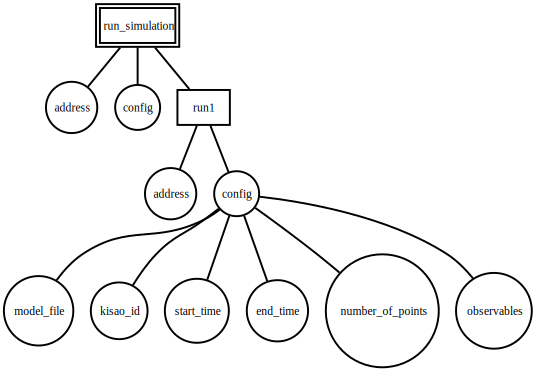

In [15]:
plot_bigraph(demo1.bigraph)

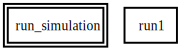

In [16]:
plot_flow(demo1.bigraph)

## 2. Run a single steady-state simulation, The run returns a 1D array containing the steady state values.

In [18]:
# Initialize
demo2 = SEDBuilder()

# Load a model
demo2.add_model(
    model_id='model1',
    source=MODEL_PATH,
    language='sbml',
)

# Set up the simulator
demo2.add_simulator(
    simulator_id='simulator1',
    name='copasi',
    version='',
    kisao_id='0000407',  # steady-state method
)

# Begin the simulation step
demo2.start_step(step_id='run_steady_state')

# Add a steady-state simulation run configuration
# No need for start_time, end_time, or number_of_points since it's a steady-state simulation
demo2.add_simulation(
    simulation_id='steady_state_sim',
    simulator_id='simulator1',
    model_id='model1',
)

# # Execute the simulation
# steady_state_values = demo2.execute()

# print(steady_state_values)

In [19]:
demo2.print_sed_doc()

{ 'run_steady_state': { '_depends_on': None,
                        '_type': 'composite',
                        'address': '',
                        'config': {},
                        'steady_state_sim': { '_type': 'step',
                                              'address': 'local:copasi',
                                              'config': { 'end_time': None,
                                                          'kisao_id': 'KISAO:0000407',
                                                          'model_file': 'demo_processes/Caravagna2010.xml',
                                                          'number_of_points': None,
                                                          'observables': None,
                                                          'start_time': None},
                                              'wires': {}},
                        'wires': {}}}


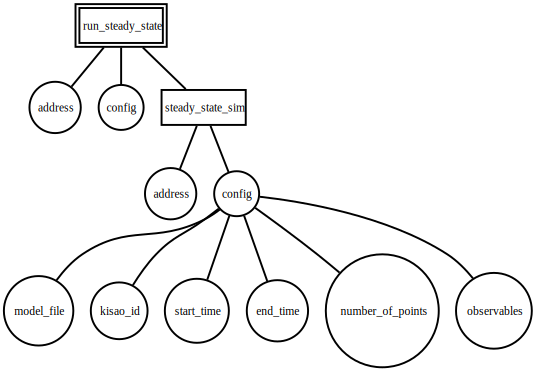

In [20]:
plot_bigraph(demo2.bigraph)

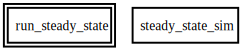

In [21]:
plot_flow(demo2.bigraph)

## 3. Set parameters and/or initial conditions and run time course or steady state evaluation.

In [23]:
# set run type to either 'time_course' or 'steady_state'
run_type = 'steady_state'

# Initialize
demo3 = SEDBuilder()

# Load a model
demo3.add_model(
    model_id='model1',
    source=MODEL_PATH,
    language='sbml',
)

# load the model with changes, parameters or initial conditions
demo3.add_model(
    model_id='model2',
    source=MODEL_PATH,
    language='sbml',
    changes={
        'param1': 10,
        'param2': 1,
    }
)

# Set up the simulator for time course or steady state
demo3.add_simulator(
    simulator_id='simulator1',
    name='copasi',
    version='YourSimulatorVersion',
    kisao_id='0000407' if 'steady_state' else '',  # TODO -- get uniform time coarse id.
)

# Begin the simulation step
demo3.start_step(step_id='parameter_tuning')

# Add a simulation run configuration for time course or steady state
if run_type == 'time_course':
    demo3.add_simulation(
        simulation_id='sim_run',
        simulator_id='simulator1',
        model_id='model1',
        start_time=0,
        end_time=100,
        number_of_points=1000,
        algorithm_parameters={'type': 'time_course'}
    )
elif run_type == 'steady_state':
    demo3.add_simulation(
        simulation_id='sim_run',
        simulator_id='simulator1',
        model_id='model1',
    )

# # Execute the simulation
# results = demo3.execute()
# print(results)

In [24]:
demo3.print_sed_doc()

{ 'parameter_tuning': { '_depends_on': None,
                        '_type': 'composite',
                        'address': '',
                        'config': {},
                        'sim_run': { '_type': 'step',
                                     'address': 'local:copasi',
                                     'config': { 'end_time': None,
                                                 'kisao_id': 'KISAO:0000407',
                                                 'model_file': 'demo_processes/Caravagna2010.xml',
                                                 'number_of_points': None,
                                                 'observables': None,
                                                 'start_time': None},
                                     'wires': {}},
                        'wires': {}}}


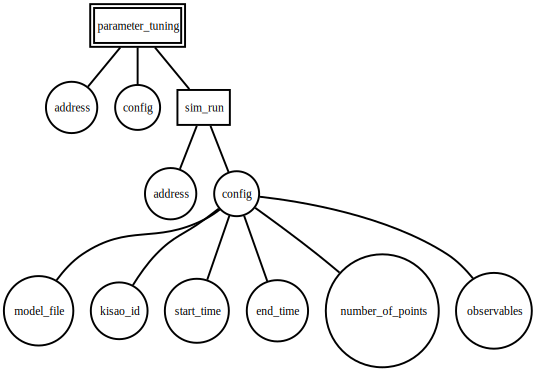

In [25]:
plot_bigraph(demo3.bigraph)

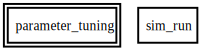

In [26]:
plot_flow(demo3.bigraph)

## 4. Repeat simulations any number of times and with any degree of nesting.  Any changes may be applied to parameters, initial conditions etc within the repeated simulations.  The results of the simulation will be collected into arrays.

## 5. Carry out an n-D parameter scan and return the results in an array.

In [27]:
# Initialize
demo5 = SEDBuilder()

# Define the parameters and their ranges for the scan
parameter_ranges = {
    'param1': [0.1, 1.0, 10.0],
    'param2': [20, 50, 100],
}

# Create models for each set of parameter values
for value1 in parameter_ranges['param1']:
    for value2 in parameter_ranges['param2']:
        model_id = f'model_param1_{value1}_param2_{value2}'
        demo5.add_model(
            model_id=model_id,
            source=MODEL_PATH,
            language='sbml',
            changes=[{'target': 'param1', 'newValue': value1},
                     {'target': 'param2', 'newValue': value2}],
        )

# Set up the simulator
demo5.add_simulator(
    simulator_id='simulator1',
    name='copasi',
    version='x.x',
    kisao_id='0000000',  # TODO get the KiSAO ID
)

# Begin a new step for the parameter scan
demo5.start_step(step_id='parameter_scan')

# Add simulations for each model
for value1 in parameter_ranges['param1']:
    for value2 in parameter_ranges['param2']:
        model_id = f'model_param1_{value1}_param2_{value2}'
        demo5.add_simulation(
            simulation_id=f'simulation_{model_id}',
            simulator_id='simulator1',
            model_id=model_id,
            start_time=0,
            end_time=100,
            number_of_points=1000,
            observables=['observable1', 'observable2'],  # Specify observables
        )

# Execute all the steps in the simulation experiment design
# results = demo5.execute()

In [28]:
demo5.print_sed_doc()

{ 'parameter_scan': { '_depends_on': None,
                      '_type': 'composite',
                      'address': '',
                      'config': {},
                      'simulation_model_param1_0.1_param2_100': { '_type': 'step',
                                                                  'address': 'local:copasi',
                                                                  'config': { 'end_time': 100,
                                                                              'kisao_id': 'KISAO:0000000',
                                                                              'model_file': 'demo_processes/Caravagna2010.xml',
                                                                              'number_of_points': 1000,
                                                                              'observables': [ 'observable1',
                                                                                               'observable2'],
         

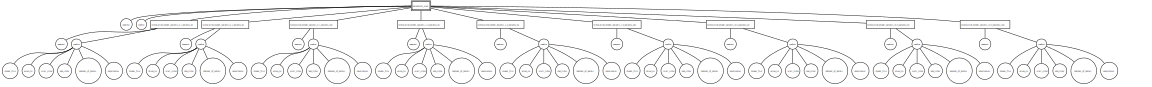

In [29]:
plot_bigraph(demo5.bigraph)

In [30]:
plot_flow(demo5.bigraph)

## 6. Load experimental data and compare it with simulation data.

In [ ]:


class KISAOReference:
    # give it an id, and it provides the relevant information




## 19. Run multiple stochastic simulations, compute means and standard deviations.

In [31]:
# Initialize
demo19 = SEDBuilder()

# Load an SBML model
demo19.add_model(
    model_id='model1',
    source=MODEL_PATH,
    language='sbml',
)

demo19.add_model(
    model_id='model2',
    source='model1',
    language='sbml',
    changes={'param1': 1.1}
)

# Set up copasi with the Gillespie algorithm
demo19.add_simulator(
    simulator_id='gillespie_simulator',
    name='copasi',
    version='',
    kisao_id='0000029',  # Gillespie algorithm
)

# Set up copasi with the steady state
demo19.add_simulator(
    simulator_id='steady_state_sim',
    name='copasi',
    version='',
    kisao_id='0000407',  # steady state
)



demo19.add_task(name='steady_state', inputs=[], outputs=['sim1', 'sim2'])
demo19['steady_state'].add_tasks(
    name='sim1', 
    algorithm_id='steady_state_sim', 
    model_id='model1', 
    outputs=['species1', 'species2', '_model_state']  # This is actually determined by Kisao ID. shape and types 
)  # default outputs are all species?

demo19['steady_state'].add_tasks(name='sim2', algorithm_id='steady_state_sim', model_id='model2', outputs=['species1', 'species2'])

demo19.add_task(name='eigenvalues', inputs=['sim1', 'sim2'], outputs=[])
demo19['eigenvalues'].add_tasks(name='ev1', algorithm_id='', inputs=[])





demo19.add_task(task_id='stochastic_simulations', inputs=[], outputs=[])
demo19.add_task(task_id='data_processing', inputs=[], outputs=[])
demo19.add_task(task_id='plotting', inputs=[], outputs=[])





demo19['stochastic_simulations'].add_simulation()
demo19['stochastic_simulations'].add_simulation()
demo19['stochastic_simulations'].add_simulation()
demo19['stochastic_simulations'].add_simulation()


demo19['data_processing'].add_data_generator(operations=['mean',], inputs=[], outputs=[])


demo19['plotting'].add_visualization(name='line', inputs=[], outputs=[])



demo19.to_json()
demo19.to_xml()
demo19.to_archive()

# sed_document = demo19.get_document()

# simulation = Composite(sed_document=sed_document)
# sim.run()


# Begin the first step - running stochastic simulations
demo19.start_step(step_id='stochastic_simulations')

# Define the number of simulations
n_simulations = 10
# Run the defined number of stochastic simulations
for i in range(n_simulations):
    demo19.add_simulation(
        simulation_id=f'simulation_{i}',
        simulator_id='gillespie_simulator',
        model_id='model1',
        start_time=0,
        end_time=100,
        number_of_points=1000,
        # Assuming that 'observables' are the species or parameters of interest
        observables=['species1', 'species2'],
    )

# Begin the second step - data processing for mean and standard deviation
demo19.start_step(step_id='data_processing')

# Add data generator for mean and standard deviation for the observables
# We are assuming that the SEDBuilder will internally handle the retrieval of
# simulation results and compute the required statistics
for observable in ['species1', 'species2']:
    demo19.add_data_generator(
        data_id=f'stats_{observable}',
        observables=observable,
        operations=['mean', 'standard_deviation']
    )

# Begin the third step - plotting the results
demo19.start_step(step_id='plotting')

# Plot the mean and standard deviation for each observable
for observable in ['species1', 'species2']:
    demo19.add_visualization(
        plot_id=f'plot_stats_{observable}',
        plot_type='line',
        title=f'Statistics of {observable} Concentration',
        x_label='Time',
        y_label='Concentration',
        legend=['Mean', 'Standard Deviation']
    )

# Execute the simulation experiment
# demo19.execute()

In [32]:
demo19.print_sed_doc()

{ 'data_processing': { '_depends_on': 'stochastic_simulations',
                       '_type': 'composite',
                       'address': '',
                       'config': {},
                       'stats_species1': { '_type': 'step',
                                           'address': 'local:data_operation',
                                           'config': { 'observables': 'species1',
                                                       'operations': [ 'mean',
                                                                       'standard_deviation']},
                                           'wires': {}},
                       'stats_species2': { '_type': 'step',
                                           'address': 'local:data_operation',
                                           'config': { 'observables': 'species2',
                                                       'operations': [ 'mean',
                                                                  

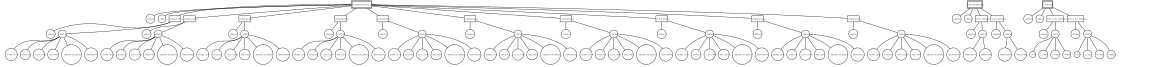

In [33]:
plot_bigraph(demo19.bigraph)

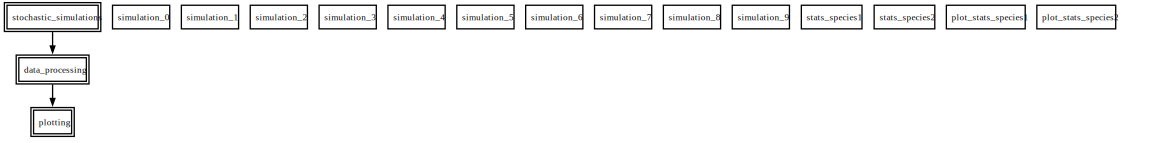

In [34]:
plot_flow(demo19.bigraph)

## 21. Run a simulation, change the structure of the model, rerun the simulation, compare.

In [35]:
# Initialize the SEDBuilder
demo21 = SEDBuilder()

# Load an SBML model
demo21.add_model(
    model_id='model1',
    source=MODEL_PATH,
    language='sbml',
)

# Set up the simulator
demo21.add_simulator(
    simulator_id='simulator1',
    name='copasi',
    version='',
    kisao_id='',
)

# Begin the first step - run the initial simulation
demo21.add_step(step_id='initial_simulation', inputs=[], outputs=[])   # TODO 
demo21.add_step(step_id='modify_model')








# Add the first simulation
demo21.add_simulation(
    step_id='initial_simulation'
    simulation_id='initial_run',
    simulator_id='simulator1',
    model_id='model1',
    start_time=0,   # TODO -- these are not parts of a composite, we need a higher order step that runs the composite.
    end_time=100,
    number_of_points=1000,
    observables=['observable1', 'observable2'],
)





# Save the initial results for comparison
demo21.add_data_generator(
    data_id='initial_results',
    observables=['observable1', 'observable2'],
    operations=['value']
)

# Begin the second step - modify the structure of the model


# Perform modifications on the model, e.g., change parameter values, add or remove reactions
demo21.add_model(
    model_id='model2',
    source=MODEL_PATH,
    language='sbml',
    changes=[
        {'type': 'parameter', 'id': 'param1', 'new_value': 1.5},
        # Add more changes as needed
    ]
)

# Begin the third step - run the simulation with the modified model
demo21.start_step(step_id='modified_simulation')

# Add the second simulation using the modified model
demo21.add_simulation(
    simulation_id='modified_run',
    simulator_id='simulator1',
    model_id='model1',
    start_time=0,
    end_time=100,
    number_of_points=1000,
    observables=['observable1', 'observable2'],
)

# Save the modified results for comparison
demo21.add_data_generator(
    data_id='modified_results',
    observables=['observable1', 'observable2'],
    operations=['value']
)

# Begin the fourth step - compare the results
demo21.start_step(step_id='compare_results')

# Compare the results of the initial and modified simulations
demo21.add_data_generator(
    data_id='compare_results',
    # data_id1='initial_results',
    # data_id2='modified_results',
    generator_id='difference',  # Assuming 'difference' is a supported comparison type
)

# Execute the simulation experiment
# demo21.execute()

In [36]:
demo21.print_sed_doc()

{ 'compare_results': { '_depends_on': 'modified_simulation',
                       '_type': 'composite',
                       'address': '',
                       'compare_results': { '_type': 'step',
                                            'address': 'local:difference',
                                            'config': { 'observables': None,
                                                        'operations': None},
                                            'wires': {}},
                       'config': {},
                       'wires': {}},
  'initial_simulation': { '_depends_on': None,
                          '_type': 'composite',
                          'address': '',
                          'config': {},
                          'initial_results': { '_type': 'step',
                                               'address': 'local:data_operation',
                                               'config': { 'observables': [ 'observable1',
                     

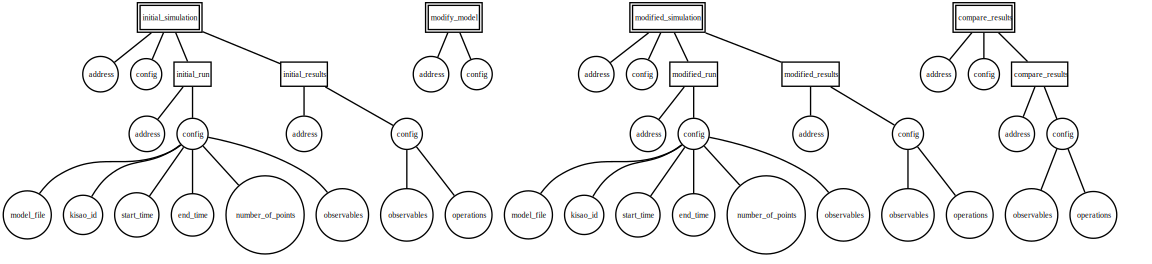

In [37]:
plot_bigraph(demo21.bigraph)

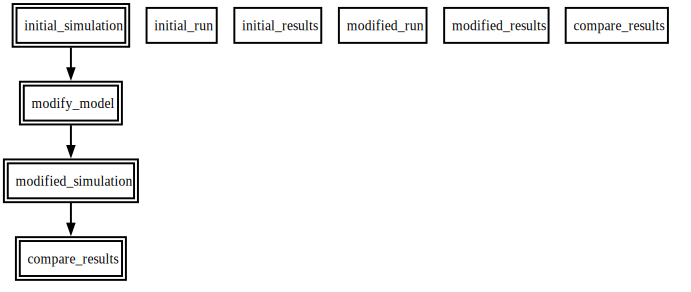

In [38]:
plot_flow(demo21.bigraph)